<a href="https://colab.research.google.com/github/jinsusong/study-paper-review/blob/main/15_RoBERTa_ARobustly_Optimized_BERT_Pretraining_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RoBERTa: ARobustly Optimized BERT Pretraining Approach

## Background

BERT : 기존 문맥에 따라 토큰의 임베딩 벡터를 생성한 ELMo의 transformer 구조를 사용하고, Transformer의 인코더를 이용해 사전 학습 모델을 구축한 GPT-1의 Bidiraction LM 모델을 semi supervised learning 을 통해 구축한 pre-training 모델

RoBERT 이전에도 ELMo, GPT, 등의 모델이 발표되어 이전 단순한 RNN모델에 비해 상당한 성능개선을 이루어냄.

이러한 접근법 중에 어떤 것이 가장 좋은지 판단하기 위해서는 동일한 데이터를 이용해서 최적의 하이퍼파라미터를 찾아 비교해야함. 

하지만 각 모델을 훈련시키는데 적지 않은 비용이 소모되고 논문에서 사용한 데이터가 다 다르기 때문에 직접적인 비교가 불가능했음.

RoBERT는 BERT 모델의 여러가지 하이퍼파라미터를 수정하는 작업을 통해 연구를 진행함.

논문에서는 BERT가 아직 충분히 학습되지 않아 under fiting 되어있다고 판단함.

이에 RoBERT 구조를 사용하여 BERT를 개선함. 


1. BERT : 트랜스포머의 인코더 부분을 가지고 와서 16GB의 대용량 데이터를 학습시킨 pre-training 모델 

2. Training Objectives
    - Masked Language Model
    - Next Sentence Prediction

3. Optimization
    - Adam
    - droupout of 0.1 
    - GELU activation function
    - 1,000,000 updates
    - 256 minibatch
    - 512 tokens.

4. Data (16GB)
    - BOOKCORPUS
    - English Wikipedia




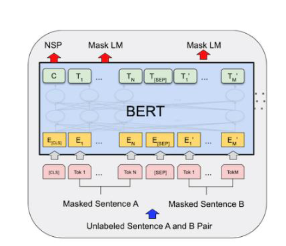

1. BERT는 레이블이 없는 데이터를 학습하는 semi supervised model이기 때문에 실제로는 입력 데이터만 존재함. 

2. 이 상황에서 MLM은 모델이 문장을 이해할 수 있도록 도와주는 목적함수 
MLM : 15% 확률로 입력 토큰을 삭제하고 해당 토큰을 예측하는 테스크를 수행함 .

3. 모델은 문맥에 맞는 단어를 예측하면서 문장의 구성을 파악할 수 있음. 

4. 많은 NLP task가 다른 종류의 sentence 간의 관계를 살펴볼 필요가 있다는 점에 주목을 함. 

5. NSP : 입력으로 주어진 두 sentence 간에 이어지는 문장인지 여부를 판단하는 이진 분류 테스크임. 

6. 실제로 이어진 Pasitive example은 훈련데이터에서 sampleing이 되고 

7. 이어져있지 않은 negative example는 서로 다른 문서에서 sampleing 되어 구성됨.

8. 학습과정은 두 문장 사이에 위치한 SEP 토큰을 이용해서 이진 분류 테스크를 수행 

9. 두 문장이 내용적으로 유사하고 이어지는 문장인지 파악하게 됨.


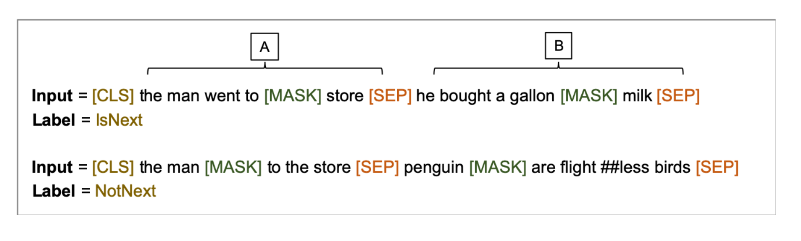

## RoBERTa 가 BERT에서 개선한 점

1. 더 큰 배치로 더 많은 데이터에 대해 모델을 더 오래 훈련하고, 
2. NSP 목적 함수를 제거하고, 
3. 더 긴 시퀀스에 대한 훈련, 
4. 훈련 데이터에 적용된 마스킹 패턴을 동적으로 변경하는 것을 포함한다. 또한 훈련 세트 크기 효과를 보다 효과적으로 제어하기 위해 다른 민간 데이터 세트와 비슷한 크기의 대규모 새 데이터 세트(CC-NEWS)를 수집한다. 

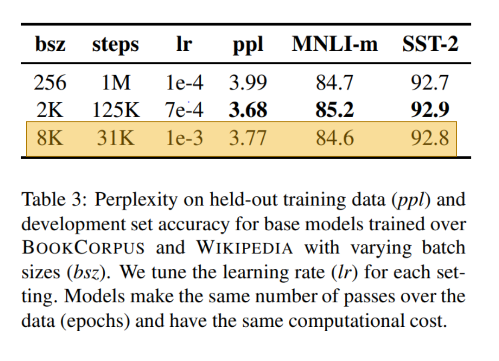

큰 배치 사이즈가 분산처리에서 더 용이함. 


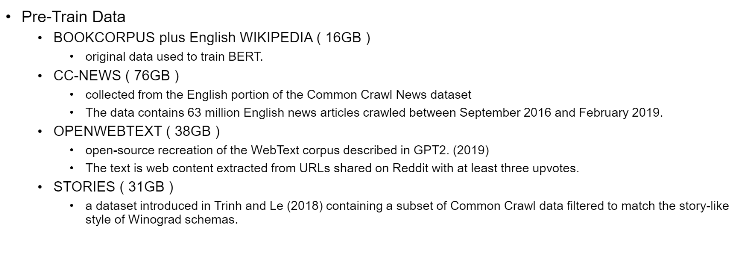

BERT가 16GB의 데이터 셋을 사용한 것에 비해 RoBERTa는 160GB의 데이터를 이용함. 


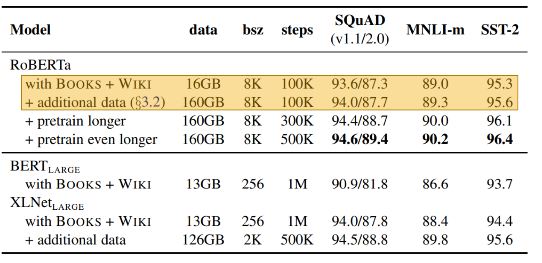

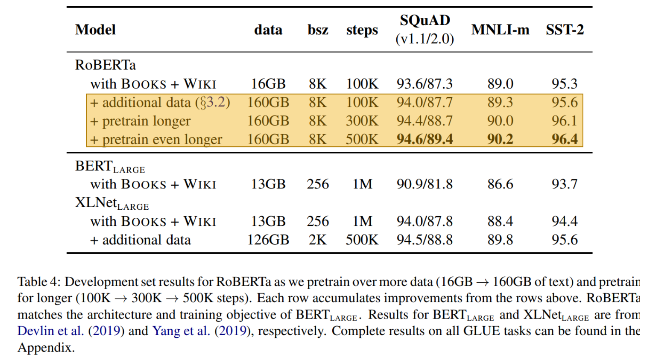

## Removing the next sentence prediction objective 

1. BERT에서는 NSP Object를 이용하는 것이 더 좋은 성능을 보인다고 제안하였지만 
2. 이후 발표된 XLNet에서는 NSP Object를 사용하는것이 성능향상에 큰 도움이 되지 않았다고 의문을 가지기 시작함
3. RoBERTa 에서는 NSP Object의 필요성을 확인하기 위해 4가지 실험을 진행함. 
    1. BERT 와 같은 방법으로 실험을 진행 
        - 두 개의 문장이 이어져있을 경우 긍정, 아닐경우 부정으로 학습 
    2. 첫 번째 실험과 유사하지만 각각의 입력에는 두 개의 문장만을 사용한다는 점이 다르다.
        - 두 개의 문장만 비교했을 때 이어져있을 경우 긍정, 아닐경우 부정   
        - 이 경우 기존의 방식보다 입력 토큰의 길이가 짧아지기 때문에 RoBERTa 에서는 입력 토큰의 갯수를 맞추기 위해 Batch 크기를 키워서 학습을 진행
    3. NSP Loss 제거하는 방법
        - 문장이 다른 문서를 넘어가는 경우 문장을 이어서 입력으로 사용
    4. 세 번째 실험과 유사하지만 입력을 한 문서에서만 사용한다는 점에서 차이가 있음.
        - 하나의 입력은 하나의 문서에서만 만들게 되고 이전 방식에 비해 토큰의 길이가 짧아지기 때문에 배치 크기를 늘려 입력 토큰의 개수를 비슷하게 사용함.

     

## 실험 결과 


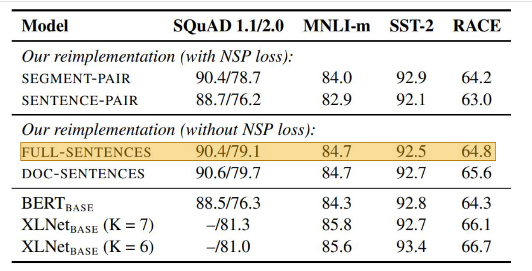

NSP Object를 제거하는 것이 성능이 비슷하거나 증가하는것을 확인할 수 있었고 
4번째 방식인 DOC-sentences 방식이 가장 좋은 성능을 보였지만 
배치 크기에 변함이 없는 FULL-sentences 방식을 최종적으로 사용함. 


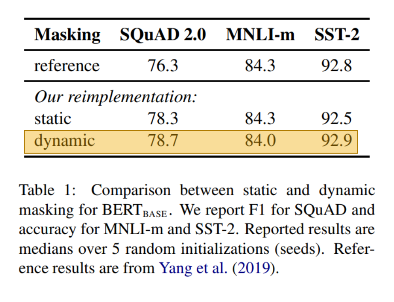

RoBERTa는 입력을 피드할 때마다 새로운 마스킹 패턴을 생성하여 실험을 진행하였고 기존의 방식보다 좋은 성능을 보임 


RoBERTa에서는 GPT2에서 사용한 BPE를 사용함. 
- end task 성능이 조금 감소하지만 RoBERTa에서는 성능감소 보다는 BPE를 사용해서 얻을 수 있는 OOV 해결 이익이 더 크다고 생각하여 해당 방식을 사용

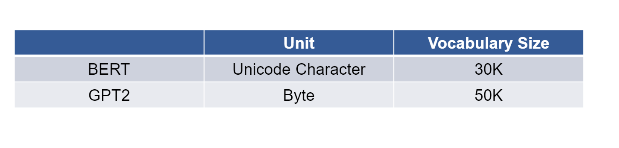

## Result 

Evaluation Dataset 

- GLUE : 범용적인 자연어 이해를 목적으로 개발된 데이터 셋, 다양하고 해결하기 어려운 9가지 데이터로 구성되어 있어서 모델들의 자연어 성능을 평가하기 위해 고안됨.

- SQuAD : 컴퓨터가 주어진 문서를 읽고 답을 찾아내는 데이터 셋, 질의 응답 데이터 셋

- RACE : 가장 어려운 QA 데이터 셋 중 하나로 알려짐. 긴 문장에 대한 이해척도에서 사용할 수 있음. BERT에서는 사용하지 않음.


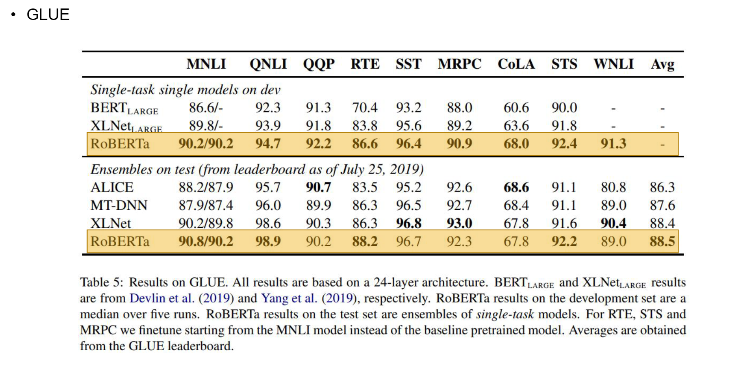

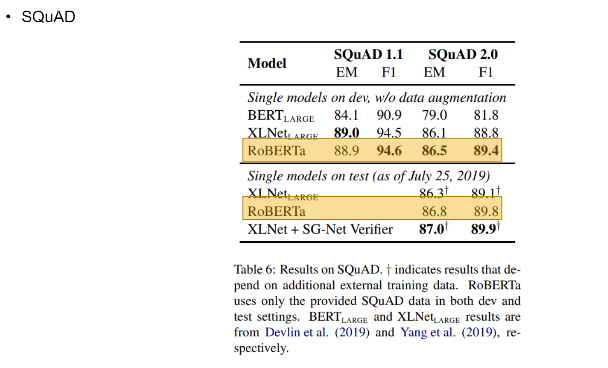

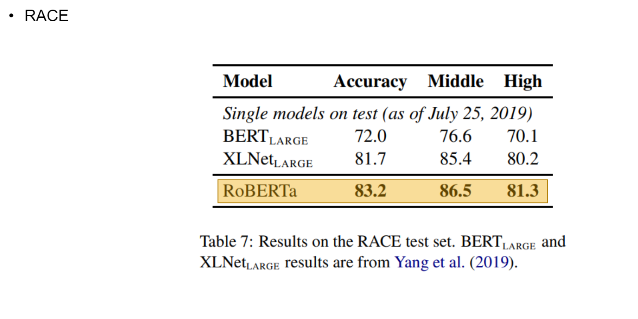

## Conclusion

결론적으로 RoBERTa는 조금 더 길게 학습하고 배치사이즈를 늘려서 성능을 올려 SOTA를 만들어냄

출처 : https://www.youtube.com/watch?v=9vRzTwjtx9s